In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd

#import tensorflow as tf
#from tensorflow import keras

import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(1)

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_data()

y = 0. It's a non-cat picture.


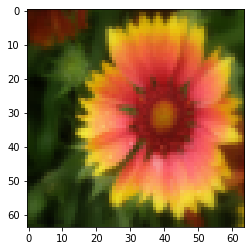

In [4]:
# Example of a picture
index = 77
plt.imshow(X_train_orig[index])
print ("y = " + str(Y_train_orig[0,index]) + ". It's a " + classes[Y_train_orig[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 209
number of test examples = 50
X_train shape: (209, 64, 64, 3)
Y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
Y_test shape: (50, 1)


In [6]:
def ALEXNET_Model():
    
    model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')  
    
    
])
    
    return model

In [7]:
AlexNet = ALEXNET_Model()

In [8]:
AlexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy']
               )

In [9]:
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)         5

In [10]:
AlexNet.fit(X_train, Y_train, epochs=50, batch_size=16)

Epoch 1/50
14/14 [==============================] - 2s 84ms/step - loss: 0.7578 - accuracy: 0.5981
Epoch 2/50
14/14 [==============================] - 1s 86ms/step - loss: 0.7252 - accuracy: 0.6507
Epoch 3/50
14/14 [==============================] - 1s 98ms/step - loss: 0.5987 - accuracy: 0.6986
Epoch 4/50
14/14 [==============================] - 1s 96ms/step - loss: 0.5310 - accuracy: 0.6986
Epoch 5/50
14/14 [==============================] - 1s 94ms/step - loss: 0.4997 - accuracy: 0.7416
Epoch 6/50
14/14 [==============================] - 1s 101ms/step - loss: 0.4425 - accuracy: 0.79430s - loss: 0.4140 - ac
Epoch 7/50
14/14 [==============================] - 2s 105ms/step - loss: 0.3643 - accuracy: 0.8708
Epoch 8/50
14/14 [==============================] - 1s 92ms/step - loss: 0.3934 - accuracy: 0.8134
Epoch 9/50
14/14 [==============================] - 1s 103ms/step - loss: 0.4030 - accuracy: 0.8086
Epoch 10/50
14/14 [==============================] - 1s 96ms/step - loss: 0.2862 - a

In [11]:
los, auc = AlexNet.evaluate(X_train, Y_train)
print()
print(los) 
print(auc)

7/7 [==============================] - 1s 27ms/step - loss: 0.5267 - accuracy: 0.8038

0.526702880859375
0.8038277626037598


In [12]:
los, auc = AlexNet.evaluate(X_test, Y_test)
print()
print(los) 
print(auc)

2/2 [==============================] - 0s 26ms/step - loss: 0.8712 - accuracy: 0.7600

0.8712033033370972
0.7599999904632568


In [13]:
def VVG16_Model():
    
    model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same",input_shape=(64,64,3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"), 
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"), 
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)), 
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),  
        
        
])
    
    return model ; 

In [14]:
Vvg16 = VVG16_Model()

In [15]:
Vvg16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='binary_crossentropy',
                     metrics=['accuracy'])

In [16]:
Vvg16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 256)      

In [17]:
Vvg16.fit(X_train, Y_train, epochs=8, batch_size=16)

Epoch 1/8
14/14 [==============================] - 28s 2s/step - loss: 0.6562 - accuracy: 0.6364
Epoch 2/8
14/14 [==============================] - 28s 2s/step - loss: 0.6268 - accuracy: 0.6555
Epoch 3/8
14/14 [==============================] - 24s 2s/step - loss: 0.6037 - accuracy: 0.6555
Epoch 4/8
14/14 [==============================] - 24s 2s/step - loss: 0.5616 - accuracy: 0.6555
Epoch 5/8
14/14 [==============================] - 30s 2s/step - loss: 0.5414 - accuracy: 0.6890
Epoch 6/8
14/14 [==============================] - 31s 2s/step - loss: 0.6537 - accuracy: 0.6459
Epoch 7/8
14/14 [==============================] - 27s 2s/step - loss: 0.5989 - accuracy: 0.6699
Epoch 8/8
14/14 [==============================] - 27s 2s/step - loss: 0.5079 - accuracy: 0.7033


In [18]:
los, auc = Vvg16.evaluate(X_train, Y_train)
print()
print(los) 
print(auc)

7/7 [==============================] - 7s 840ms/step - loss: 0.4585 - accuracy: 0.7943

0.4585007429122925
0.7942583560943604


In [19]:
los, auc = Vvg16.evaluate(X_test, Y_test)
print()
print(los) 
print(auc)

2/2 [==============================] - 2s 578ms/step - loss: 0.5794 - accuracy: 0.7800

0.5794036388397217
0.7799999713897705
